In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Backpropagation

### Objectives

In this chapter, we continue our discussion of performance learning, which we began in Chapter 8, by presenting a generalization of the LMS algorithm from Chapter 10. This generalization, called backpropagation, can be used to train multilayer networks. 

As with the LMS learning law, backpropagation is an approximate steepest descent algorithm, in which the performance index is the mean square error. The difference between the LMS algorithm and backpropagation is primarily in the way the derivatives are calculated.

For a single-layer linear network, the error is an explicit linear function of the network weights, and its derivatives with respect to the weights can be easily computed. However, in multilayer networks with nonlinear transfer functions, the relationship between the network weights and the error is more complex. 

In order to calculate the derivatives, we need to use the chain rule of calculus. In fact, this chapter is largely a demonstration of how to use the chain rule.

The mean square error can be defined as:

$$
E = \frac{1}{N} \sum_{i=1}^{N} (d_i - y_i)^2
$$

where:
- $ E $ is the mean square error,
- $ N $ is the number of samples,
- $ d_i $ is the desired output,
- $ y_i $ is the actual output of the network.

To compute the derivatives using the chain rule, we can express the error as a function of the weights:

$$
\frac{\partial E}{\partial w_j} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w_j}
$$

where:
- $ w_j $ represents the weights of the network.


## Theory and Examples

The perceptron learning rule of Frank Rosenblatt and the LMS algorithm of Bernard Widrow and Marcian Hoff were designed to train single-layer perceptron-like networks. As we have discussed in previous chapters, these single-layer networks suffer from the disadvantage of being only able to solve linearly separable classification problems. 

Both Rosenblatt and Widrow were aware of these limitations and proposed multilayer networks that could overcome them, but they were not able to generalize their algorithms to train these more powerful networks. Apparently, the first description of an algorithm to train multilayer networks was contained in the thesis of Paul Werbos in 1974 \cite{Werbo74}. This thesis presented the algorithm in the context of general networks, with neural networks as a special case, and was not disseminated in the neural network community. 

It was not until the mid-1980s that the backpropagation algorithm was rediscovered and widely publicized. It was rediscovered independently by David Rumelhart, Geoffrey Hinton, and Ronald Williams \cite{RuHi86}, David Parker \cite{Park85}, and Yann Le Cun \cite{LeCu85}. The algorithm was popularized by its inclusion in the book *Parallel Distributed Processing* \cite{RuMc86}, which described the work of the Parallel Distributed Processing Group led by psychologists David Rumelhart and James McClelland. The publication of this book spurred a torrent of research in neural networks.

The multilayer perceptron, trained by the backpropagation algorithm, is currently the most widely used neural network. In this chapter, we will first investigate the capabilities of multilayer networks and then present the backpropagation algorithm.

## Multilayer Perceptrons


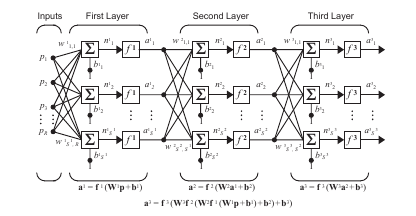

Figure.1 Three-Layer Network


We first introduced the notation for multilayer networks in Chapter 2. For ease of reference, we have reproduced the diagram of the three-layer perceptron in Figure.1. Note that we have simply cascaded three perceptron networks. The output of the first network is the input to the second network, and the output of the second network is the input to the third network. Each layer may have a different number of neurons and even a different transfer function. 

Recall from Chapter 2 that we are using superscripts to identify the layer number. Thus, the weight matrix for the first layer is written as $ W^1 $ and the weight matrix for the second layer is written as $ W^2 $. To identify the structure of a multilayer network, we will sometimes use the following shorthand notation, where the number of inputs is followed by the number of neurons in each layer:

$$
R \to S_1 \to S_2 \to S_3 \quad (11.1)
$$

### Pattern Classification

To illustrate the capabilities of the multilayer perceptron for pattern classification, consider the classic exclusive-or (XOR) problem. The input/target pairs for the XOR gate are:

$$
\begin{align*}
\text{For } t = 0, & \quad p_1 = 0 \\
\text{For } t = 1, & \quad p_2 = 1 \\
\text{For } t = 1, & \quad p_3 = 1 \\
\text{For } t = 0, & \quad p_4 = 1 
\end{align*}
$$

This problem, which is illustrated graphically, was used by Minsky and Papert in 1969 to demonstrate the limitations of the single-layer perceptron. Because the two categories are not linearly separable, a single-layer perceptron cannot perform the classification. 

A two-layer network can solve the XOR problem. In fact, there are many different multilayer solutions. One solution is to use two neurons in the first layer to create two decision boundaries. The first boundary separates $ p_1 $ from the other patterns, and the second boundary separates $ p_4 $. Then the second layer is used to combine the two boundaries together using an AND operation.

### Decision Boundaries

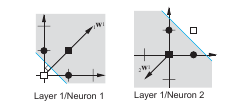

Figure.2 Decision Boundaries for XOR Network

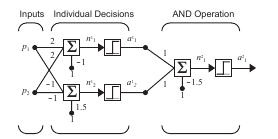

Figure.3 Two-Layer XOR Network

The decision boundaries for each first-layer neuron can be represented as shown in Figure.2.

The resulting two-layer, 2-2-1 network is shown in Figure.3. The overall decision regions for this network indicate those inputs that will produce a network output of 1. 

### Function Approximation

Up to this point in the text, we have viewed neural networks mainly in the context of pattern classification. It is also instructive to view networks as function approximators. 

In control systems, for example, the objective is to find an appropriate feedback function that maps from measured outputs to control inputs. In adaptive filtering (Chapter 10), the objective is to find a function that maps from delayed values of an input signal to an appropriate output signal.

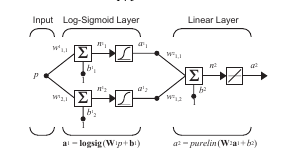

Figure.4 Example Function Approximation Network


Consider the two-layer, 1-2-1 network shown in Figure.4. For this example, the transfer function for the first layer is log-sigmoid, and the transfer function for the second layer is linear:

$$
f_1(n) = \frac{1}{1 + e^{-n}}, \quad f_2(n) = n \quad (11.2)
$$

Suppose that the nominal values of the weights and biases for this network are:

$$
\begin{align*}
w_{1,1}^1 &= 10, & w_{2,1}^1 &= 10, & b_1 &= -10, \\
w_{1,1}^2 &= 1, & w_{1,2}^2 &= 1, & b_2 &= 0 
\end{align*}
$$

The network response for these parameters is shown in Figure.5, which plots the network output $ a $ as the input $ p $ is varied over the range $ [-2, 2] $. Notice that the response consists of two steps, one for each of the log-sigmoid neurons in the first layer.

By adjusting the network parameters, we can change the shape and location of each step. The centers of the steps occur where the net input to a neuron in the first layer is zero:

$$
n_1 = w_{1,1}^1 p + b_1 = 0 \Rightarrow p = -\frac{b_1}{w_{1,1}^1} = -\frac{-10}{10} = 1 \quad (11.3)
$$

### Network Response

The expression for the second layer is given by:

$$
n_2 = w_{2,1}^2 p + b_2 = 0 \Rightarrow p = -\frac{b_2}{w_{2,1}^2} = -\frac{10}{1} = -10 \quad (11.4)
$$

The steepness of each step can be adjusted by changing the network weights.

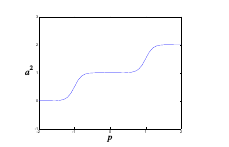

Figure.5 illustrates the nominal response of the network shown in Figure.4.

### Parameter Changes

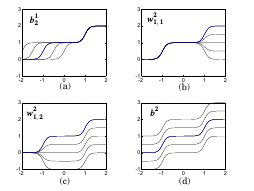

Figure.6 Effect of Parameter Changes on Network Response


Figure 11.6 illustrates the effects of parameter changes on the network response. The blue curve is the nominal response. The other curves correspond to the network response when one parameter at a time is varied over the following ranges:

$$
\begin{align*}
-1 & \leq w_{1,1}^2 \leq 1, \\
-1 & \leq w_{1,2}^2 \leq 1, \\
0 & \leq b_2 \leq 20, \\
-1 & \leq b_1 \leq 1 \quad (11.5)
\end{align*}
$$

#### Effect of Parameter Changes

- **Figure.6 (a):** Shows how the network biases in the first (hidden) layer can be used to locate the position of the steps.
- **Figure.6 (b):** Illustrates how the weights determine the slope of the steps.
- **Figure.6 (d):** Demonstrates that the bias in the second (output) layer shifts the entire network response up or down.

From this example, we can see how flexible the multilayer network is. It would appear that we could use such networks to approximate almost any function, provided we have a sufficient number of neurons in the hidden layer. 

In fact, it has been shown that two-layer networks, with sigmoid transfer functions in the hidden layer and linear transfer functions in the output layer, can approximate virtually any function of interest to any degree of accuracy, provided sufficiently many hidden units are available \cite{HoSt89}.

To experiment with the response of this two-layer network, use the MATLAB® Neural Network Design Demonstration Network Function `nnd11nf`.

Now that we have some idea of the power of multilayer perceptron networks for pattern recognition and function approximation, the next step is to develop an algorithm to train such networks.






In [2]:
import math

class Layer:
    def __init__(self, input_size, output_size, activation_function):
        # Initialize weights and biases
        self.weights = [[0.01 * (1 if i == j else 0) for j in range(output_size)] for i in range(input_size)]
        self.biases = [0.01 for _ in range(output_size)]
        self.activation_function = activation_function
        self.inputs = []
        self.outputs = []

    def forward(self, inputs):
        # Store inputs for backpropagation
        self.inputs = inputs
        # Calculate output
        self.outputs = []
        for j in range(len(self.biases)):
            net_input = sum(inputs[i] * self.weights[i][j] for i in range(len(inputs))) + self.biases[j]
            self.outputs.append(self.activation_function.sigmoid(net_input))  # Call sigmoid function
        return self.outputs

    def backward(self, d_outputs):
        # Calculate gradients and propagate backward
        d_inputs = [0] * len(self.inputs)  # Initialize derivative of inputs

        for j in range(len(self.biases)):
            for i in range(len(self.inputs)):
                # Gradient of the weights
                gradient = d_outputs[j] * self.activation_function.sigmoid_derivative(self.outputs[j])
                d_inputs[i] += gradient * self.weights[i][j]
                self.weights[i][j] -= learning_rate * gradient * self.inputs[i]  # Update weights

            # Update biases
            self.biases[j] -= learning_rate * d_outputs[j] * self.activation_function.sigmoid_derivative(self.outputs[j])
        
        return d_inputs


class ActivationFunction:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))

    @staticmethod
    def sigmoid_derivative(output):
        return output * (1 - output)


def mean_squared_error(targets, outputs):
    return sum((targets[i] - outputs[i]) ** 2 for i in range(len(targets))) / len(targets)


# Hyperparameters
learning_rate = 0.01
epochs = 10000

# Initialize layers
input_layer = Layer(input_size=2, output_size=2, activation_function=ActivationFunction())
hidden_layer = Layer(input_size=2, output_size=2, activation_function=ActivationFunction())
output_layer = Layer(input_size=2, output_size=1, activation_function=ActivationFunction())

# Training data for XOR problem
training_data = [([0, 0], [0]), ([0, 1], [1]), ([1, 0], [1]), ([1, 1], [0])]

# Training loop
for epoch in range(epochs):
    for inputs, targets in training_data:
        # Forward pass
        hidden_outputs = hidden_layer.forward(input_layer.forward(inputs))
        outputs = output_layer.forward(hidden_outputs)

        # Calculate loss (mean squared error)
        loss = mean_squared_error(targets, outputs)

        # Backward pass
        d_output = [2 * (outputs[i] - targets[i]) for i in range(len(outputs))]
        d_hidden = output_layer.backward(d_output)
        hidden_layer.backward(d_hidden)

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Test the network after training
for inputs, targets in training_data:
    hidden_outputs = hidden_layer.forward(input_layer.forward(inputs))
    outputs = output_layer.forward(hidden_outputs)
    print(f'Input: {inputs}, Predicted: {outputs}, Target: {targets}')


Epoch 0, Loss: 0.2547039468565243
Epoch 1000, Loss: 0.25094525723811106
Epoch 2000, Loss: 0.25094249500795607
Epoch 3000, Loss: 0.25094174640600236
Epoch 4000, Loss: 0.25094100064388253
Epoch 5000, Loss: 0.25094025663421377
Epoch 6000, Loss: 0.25093951437646317
Epoch 7000, Loss: 0.25093877387064506
Epoch 8000, Loss: 0.25093803511672963
Epoch 9000, Loss: 0.25093729811464405
Input: [0, 0], Predicted: [0.4999991294478316], Target: [0]
Input: [0, 1], Predicted: [0.49999912174185657], Target: [1]
Input: [1, 0], Predicted: [0.49999913718162015], Target: [1]
Input: [1, 1], Predicted: [0.4999991294756451], Target: [0]


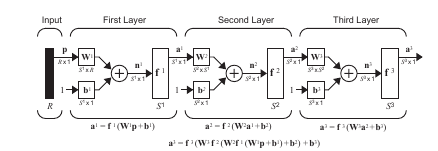

Figure.7 Three-Layer Network, Abbreviated Notation

## The Backpropagation Algorithm

It will simplify our development of the backpropagation algorithm if we use the abbreviated notation for the multilayer network, which we introduced in Chapter 2. The three-layer network in abbreviated notation is shown in Figure 11.7. As we discussed earlier, for multilayer networks, the output of one layer becomes the input to the following layer. The equations that describe this operation are:

$$
a^{m+1} = f(W^m a^m + b^m) \quad \text{for } m = 0, 1, \ldots, M - 1, \tag{11.6}
$$

where \(M\) is the number of layers in the network. The neurons in the first layer receive external inputs:

$$
a^0 = p, \tag{11.7}
$$

which provides the starting point for Eq. (11.6). The outputs of the neurons in the last layer are considered the network outputs:

$$
a^M = a. \tag{11.8}
$$

## Performance Index

The backpropagation algorithm for multilayer networks is a generalization of the LMS algorithm of Chapter 10, and both algorithms use the same performance index: mean square error. The algorithm is provided with a set of examples of proper network behavior:

$$
\{(p_1, t_1), (p_2, t_2), \ldots, (p_Q, t_Q)\}, \tag{11.9}
$$

where $p_q$ is an input to the network, and $t_q$ is the corresponding target output. As each input is applied to the network, the network output is compared to the target. The algorithm should adjust the network parameters in order to minimize the mean square error:

$$
F(x) = E[e^2] = E[(t - a)^2]. \tag{11.10}
$$

where $x$ is the vector of network weights and biases. If the network has multiple outputs, this generalizes to:

$$
F(x) = E[ee^T] = E[(t - a)(t - a)^T]. \tag{11.11}
$$

As with the LMS algorithm, we will approximate the mean square error by:

$$
\hat{F}(x) = (t^{(k)} - a^{(k)})(t^{(k)} - a^{(k)}) = e^{(k)}e^{(k)T}, \tag{11.12}
$$

where the expectation of the squared error has been replaced by the squared error at iteration $k$. The steepest descent algorithm for the approximate mean square error (stochastic gradient descent) is:

$$
w_{i,j}^{(k + 1)} = w_{i,j}^{(k)} - \alpha \frac{\partial F}{\partial w_{i,j}}, \tag{11.13}
$$

$$
b_i^{(k + 1)} = b_i^{(k)} - \alpha \frac{\partial F}{\partial b_i}, \tag{11.14}
$$

where $\alpha$ is the learning rate.

So far, this development is identical to that for the LMS algorithm. Now we come to the difficult part – the computation of the partial derivatives.

## Chain Rule

For a single-layer linear network (the ADALINE), these partial derivatives are conveniently computed using the previous equations. For the multilayer network, the error is not an explicit function of the weights in the hidden layers; therefore, these derivatives are not computed so easily. Because the error is an indirect function of the weights in the hidden layers, we will use the chain rule of calculus to calculate the derivatives.

To review the chain rule, suppose that we have a function $f$ that is an explicit function only of the variable $n$. We want to take the derivative of $f$ with respect to a third variable $w$. The chain rule is then:

$$
\frac{df(n(w))}{dw} = \frac{df(n)}{dn} \cdot \frac{dn(w)}{dw}. \tag{11.15}
$$

For example, if \(n = 2w\) and \(f(n) = e^n\), so that \(f(n(w)) = e^{2w}\), then:

$$
\frac{df(n(w))}{dw} = \frac{df(n)}{dn} \cdot \frac{dn(w)}{dw} = e^{2w} \cdot 2. \tag{11.16}
$$

We will use this concept to find the derivatives in Eqs. (11.13) and (11.14):

$$
\frac{\partial n_i^m}{\partial w_{i,j}} = \frac{\partial F}{\partial w_{i,j}} \cdot \frac{\partial n_i^m}{\partial w_{i,j}}, \tag{11.18}
$$

$$
\frac{\partial F}{\partial b_i} = \frac{\partial n_i^m}{\partial b_i} \cdot \frac{\partial n_i^m}{\partial b_i}. \tag{11.19}
$$

The second term in each of these equations can be easily computed since the net input to layer $m$ is an explicit function of the weights and biases in that layer:

$$
n_i^m = \sum_{j=1}^{m-1} w_{i,j} a_j + b_i. \tag{11.20}
$$

Therefore,

$$
\frac{\partial n_i^{m-1}}{\partial w_{i,j}} = a_j \quad \text{and} \quad \frac{\partial n_i^m}{\partial b_i} = 1. \tag{11.21}
$$

If we now define

$$
s_i^m \equiv \frac{\partial F}{\partial n_i^m}, \tag{11.22}
$$

(the sensitivity of $F$ to changes in the $i$-th element of the net input at layer $m$), then Eqs. (11.18) and (11.19) can be simplified to:

$$
\frac{\partial F}{\partial w_{i,j}} = s_i^m a_j, \tag{11.23}
$$

$$
\frac{\partial F}{\partial b_i} = s_i^m. \tag{11.24}
$$

We can now express the approximate steepest descent algorithm as:

$$
w_{i,j}^{(k + 1)} = w_{i,j}^{(k)} - \alpha s_i a_j, \tag{11.25}
$$

$$
b_i^{(k + 1)} = b_i^{(k)} - \alpha s_i. \tag{11.26}
$$

In matrix form, this becomes:

$$
W^{(k + 1)} = W^{(k)} - \alpha s (a)^T, \tag{11.27}
$$

$$
b^{(k + 1)} = b^{(k)} - \alpha s. \tag{11.28}
$$

where

$$
s \equiv \begin{bmatrix}
\frac{\partial F}{\partial n_1^m} \\
\frac{\partial F}{\partial n_2^m} \\
\vdots \\
\frac{\partial F}{\partial n_S^m}
\end{bmatrix}. \tag{11.29}
$$

(Note the close relationship between this algorithm and the LMS algorithm of Eqs. (10.33) and (10.34)).


In [3]:
class ActivationFunction:
    """Class for activation functions."""
    
    @staticmethod
    def sigmoid(x):
        """Sigmoid activation function."""
        return 1 / (1 + exp(-x))
    
    @staticmethod
    def sigmoid_derivative(output):
        """Derivative of sigmoid function."""
        return output * (1 - output)


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
        
        self.weights_hidden_output = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(hidden_size)]
        self.bias_output = [random.uniform(-1, 1) for _ in range(output_size)]
        
        self.activation_function = ActivationFunction()

    def forward(self, inputs):
        """Forward pass through the network."""
        self.hidden_inputs = [sum(inputs[i] * self.weights_input_hidden[i][j] for i in range(len(inputs))) + self.bias_hidden[j] for j in range(len(self.bias_hidden))]
        self.hidden_outputs = [self.activation_function.sigmoid(x) for x in self.hidden_inputs]
        
        self.final_inputs = [sum(self.hidden_outputs[j] * self.weights_hidden_output[j][k] for j in range(len(self.hidden_outputs))) + self.bias_output[k] for k in range(len(self.bias_output))]
        self.final_outputs = [self.activation_function.sigmoid(x) for x in self.final_inputs]
        
        return self.final_outputs

    def backward(self, inputs, targets):
        """Backward pass (backpropagation) to update weights and biases."""
        # Calculate output error
        output_errors = [(targets[k] - self.final_outputs[k]) for k in range(len(targets))]
        
        # Calculate output deltas
        output_deltas = [output_errors[k] * self.activation_function.sigmoid_derivative(self.final_outputs[k]) for k in range(len(output_errors))]
        
        # Update weights for hidden-output layer
        for j in range(len(self.weights_hidden_output)):
            for k in range(len(self.weights_hidden_output[j])):
                self.weights_hidden_output[j][k] += self.learning_rate * output_deltas[k] * self.hidden_outputs[j]
        
        # Update biases for output layer
        for k in range(len(self.bias_output)):
            self.bias_output[k] += self.learning_rate * output_deltas[k]
        
        # Calculate hidden layer errors
        hidden_errors = [sum(output_deltas[k] * self.weights_hidden_output[j][k] for k in range(len(output_deltas))) for j in range(len(self.hidden_outputs))]
        
        # Calculate hidden deltas
        hidden_deltas = [hidden_errors[j] * self.activation_function.sigmoid_derivative(self.hidden_outputs[j]) for j in range(len(hidden_errors))]
        
        # Update weights for input-hidden layer
        for i in range(len(self.weights_input_hidden)):
            for j in range(len(self.weights_input_hidden[i])):
                self.weights_input_hidden[i][j] += self.learning_rate * hidden_deltas[j] * inputs[i]
        
        # Update biases for hidden layer
        for j in range(len(self.bias_hidden)):
            self.bias_hidden[j] += self.learning_rate * hidden_deltas[j]

    def train(self, training_data, epochs):
        """Train the network on the given training data."""
        for epoch in range(epochs):
            for inputs, targets in training_data:
                self.forward(inputs)
                self.backward(inputs, targets)


# Example usage:
if __name__ == "__main__":
    import random
    from math import exp

    # Sample training data: (input, target)
    training_data = [
        ([0, 0], [0]),
        ([0, 1], [1]),
        ([1, 0], [1]),
        ([1, 1], [0])
    ]

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
    nn.train(training_data, epochs=10000)

    # Test the neural network
    for inputs, _ in training_data:
        output = nn.forward(inputs)
        print(f"Input: {inputs}, Output: {output}")


Input: [0, 0], Output: [0.0505755296257457]
Input: [0, 1], Output: [0.9399925203671456]
Input: [1, 0], Output: [0.9380277325180558]
Input: [1, 1], Output: [0.08172299702552938]


## Backpropagating the Sensitivities

The backpropagation algorithm allows us to compute the sensitivities and update the weights of a multilayer neural network. This process involves propagating the sensitivities backward through the network.

### Sensitivities

The sensitivities $ s $ can be computed using the chain rule. The backpropagation term describes a recurrence relationship where the sensitivity at layer $ m $ is computed from the sensitivity at layer $ m + 1 $.

### Jacobian Matrix

The Jacobian matrix for the network can be expressed as:

$$
\mathbf{J}^{m+1} = \begin{bmatrix}
\frac{\partial n_1^{m+1}}{\partial n_1^m} & \cdots & \frac{\partial n_1^{m+1}}{\partial n_S^m} \\
\vdots & \ddots & \vdots \\
\frac{\partial n_S^{m+1}}{\partial n_1^m} & \cdots & \frac{\partial n_S^{m+1}}{\partial n_S^m}
\end{bmatrix}
$$

Where the elements of the matrix are given by:

$$
\frac{\partial n_i^{m+1}}{\partial n_j^m} = W_{i,j}^{m+1} f'(n_j^m)
$$

Where:
- $ W_{i,j}^{m+1} $ are the weights connecting layer $ m $ to layer $ m + 1 $.
- $ f'(n_j^m) $ is the derivative of the activation function.

### Recurrence Relation for Sensitivities

Using the chain rule, the recurrence relationship for the sensitivity can be expressed as:

$$
\hat{s}^m = \mathbf{F}(n^m) \left( W^{m+1} \right)^T \hat{s}^{m+1}
$$

The sensitivities are propagated backward through the network:

$$
M \rightarrow M-1 \rightarrow \cdots \rightarrow 1
$$

### Starting Point for Sensitivities

The starting point for the sensitivities is computed at the final layer:

$$
\hat{s}_i^M = -2 \sum_{j=1}^{M} (t_j - a_j) \cdot \frac{\partial a_i}{\partial n_i}
$$

This can be expressed in matrix form as:

$$
\hat{s}^M = -2 \mathbf{F}(n^M) (t - a)
$$

### Summary of the Backpropagation Algorithm

1. **Forward Propagation:**
   - Start with the input $ a^0 = p $.
   - Compute the outputs for each layer:

$$
a^{m+1} = f(W^m a^m + b^m), \quad \text{for } m = 0, 1, \ldots, M-1
$$

2. **Backward Propagation of Sensitivities:**

$$
\hat{s}^M = -2 \mathbf{F}(n^M)(t - a)
$$

$$
\hat{s}^m = \mathbf{F}(n^m) \left( W^{m+1} \right)^T \hat{s}^{m+1}, \quad \text{for } m = M-1, \ldots, 1
$$

3. **Weight and Bias Update:**

$$
W^{m}(k+1) = W^m(k) - \alpha \hat{s}^m a^{m-1}
$$

$$
b^m(k+1) = b^m(k) - \alpha \hat{s}^m
$$

Where:
- $ \alpha $ is the learning rate.
- $ t $ is the target output.
- $ a $ is the actual output of the network.


In [4]:
import math
import random

class ActivationFunction:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

class Layer:
    def __init__(self, input_size, output_size):
        # Initialize weights and biases with small random values
        self.weights = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(input_size)]
        self.biases = [random.uniform(-1, 1) for _ in range(output_size)]
        self.outputs = []
        self.inputs = []
        self.net_inputs = []

    def forward(self, inputs):
        """Compute the output of the layer for the given inputs."""
        self.inputs = inputs
        self.net_inputs = []
        self.outputs = []
        
        for j in range(len(self.biases)):
            net_input = sum(inputs[i] * self.weights[i][j] for i in range(len(inputs))) + self.biases[j]
            self.net_inputs.append(net_input)
            self.outputs.append(ActivationFunction.sigmoid(net_input))
        
        return self.outputs

    def backward(self, output_errors, learning_rate):
        """Compute the gradients and update weights and biases."""
        for j in range(len(self.biases)):
            # Calculate the gradient for biases
            gradient = output_errors[j] * ActivationFunction.sigmoid_derivative(self.outputs[j])
            self.biases[j] -= learning_rate * gradient
            
            for i in range(len(self.inputs)):
                # Update weights
                self.weights[i][j] -= learning_rate * gradient * self.inputs[i]

        # Return the errors for the previous layer
        return [sum(self.weights[i][j] * gradient for j in range(len(self.biases))) for i in range(len(self.inputs))]

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layers = []
        for i in range(len(layer_sizes) - 1):
            self.layers.append(Layer(layer_sizes[i], layer_sizes[i + 1]))

    def forward(self, inputs):
        """Perform forward propagation."""
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs

    def backward(self, target_outputs, learning_rate):
        """Perform backward propagation."""
        # Compute the output layer errors
        output_errors = [target_outputs[i] - self.layers[-1].outputs[i] for i in range(len(target_outputs))]
        
        # Backpropagate the errors
        for layer in reversed(self.layers):
            output_errors = layer.backward(output_errors, learning_rate)

    def train(self, inputs, target_outputs, learning_rate):
        """Train the network with a single example."""
        self.forward(inputs)
        self.backward(target_outputs, learning_rate)

# Example Usage
if __name__ == "__main__":
    # Initialize the neural network with 2 input nodes, 2 hidden nodes, and 1 output node
    nn = NeuralNetwork([2, 2, 1])

    # Train the network with some data
    training_data = [
        ([0, 0], [0]),
        ([0, 1], [1]),
        ([1, 0], [1]),
        ([1, 1], [0])
    ]
    
    # Train for a number of epochs
    for epoch in range(10000):
        for inputs, target in training_data:
            nn.train(inputs, target, learning_rate=0.1)

    # Test the trained network
    print("Outputs after training:")
    for inputs, target in training_data:
        output = nn.forward(inputs)
        print(f"Input: {inputs}, Output: {output}, Target: {target}")


Outputs after training:
Input: [0, 0], Output: [0.9996715903398312], Target: [0]
Input: [0, 1], Output: [0.9997922437952167], Target: [1]
Input: [1, 0], Output: [0.9997740746059072], Target: [1]
Input: [1, 1], Output: [0.999846504650542], Target: [0]


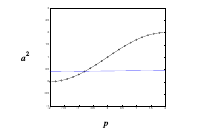

Figure.9 Initial Network Response

## Example 2: Backpropagation Algorithm

To illustrate the backpropagation algorithm, let's choose a network and apply it to a particular problem. We will use the $1-2-1$ network discussed earlier in this chapter. For convenience, we have reproduced the network in Figure 11.8.

### Problem Definition

Suppose we want to use the network to approximate the function 

$$
g(p) = 1 + \sin\left(\frac{\pi p}{4}\right) \quad \text{for } -2 \leq p \leq 2.
$$

To obtain our training set, we will evaluate this function at several values of $p$.

### Network Configuration

The network architecture consists of:

- **Input Layer**: \(p\)
- **Hidden Layer**: 
  - Log-Sigmoid activation
- **Output Layer**: 
  - Linear activation

### Initial Weights and Biases

Before we begin the backpropagation algorithm, we need to choose some initial values for the network weights and biases. These are typically chosen to be small random values. For this example, let's set:

$$
W^{(0)} = \begin{bmatrix} -0.27 \\ -0.41 \end{bmatrix}, \quad b^{(0)} = -0.48,
$$

$$
W^{(1)} = \begin{bmatrix} 0.09 \\ -0.17 \end{bmatrix}, \quad b^{(1)} = 0.48.
$$

The response of the network for these initial values is illustrated in Figure 11.9, along with the sine function we wish to approximate.

### Training Set Selection

Next, we need to select a training set $\{(p_1, t_1), (p_2, t_2), \ldots, (p_Q, t_Q)\}$. In this case, we will sample the function at 21 points in the range \([-2, 2]\) at equally spaced intervals of 0.2. The training points are indicated by the circles in Figure 11.9.

### Forward Pass

Now we are ready to start the algorithm. The training points can be presented in any order, but they are often chosen randomly. For our initial input, we will choose \(p = 1\), which is the 16th training point:

$$
a^{(0)} = p = 1.
$$

The output of the first layer is then computed as follows:

$$
a^{(1)} = f\left(W^{(1)} a^{(0)} + b^{(1)}\right) = \text{logsig}\left(-0.27 \cdot 1 - 0.48\right) = \text{logsig}(-0.75) = \frac{1}{1 + e^{0.75}} \approx 0.321.
$$

The output of the second layer is:

$$
a^{(2)} = f\left(W^{(2)} a^{(1)} + b^{(2)}\right) = \text{purelin}\left(0.09 \cdot 0.321 - 0.17 \cdot 0.368 + 0.48\right) \approx 0.446.
$$

### Error Calculation

The error can be calculated as:

$$
e = t - a = \left(1 + \sin\left(\frac{\pi \cdot 1}{4}\right)\right) - a \approx 1.261.
$$

### Backpropagation of Sensitivities

Next, we need to backpropagate the sensitivities. The derivatives of the transfer functions are:

- For the first layer:

$$
f'^{(1)}(n^{(1)}) = a^{(1)}(1 - a^{(1)}) = 0.321(1 - 0.321).
$$

- For the second layer:

$$
f'^{(2)}(n^{(2)}) = 1.
$$

Now, we can perform backpropagation starting from the second layer:

$$
s^{(2)} = -2f'^{(2)}(n^{(2)}) (t - a) = -2 \cdot 1 \cdot 1.261 = -2.522.
$$

For the first layer:

$$
s^{(1)} = f'^{(1)}(n^{(1)}) W^{(2)} s^{(2)}.
$$

### Weight Update

The final stage of the algorithm is to update the weights. Using a learning rate $\alpha = 0.1$, the updates are:

$$
W^{(1)} = W^{(0)} - \alpha s^{(1)} a^{(0)} = 0.09 - 0.1 \cdot (-0.0495) \cdot 0.321 \cdots
$$

This completes the first iteration of the backpropagation algorithm. We proceed to randomly choose another input from the training set and perform another iteration. We continue this process until the difference between the network response and the target function reaches an acceptable level.


In [5]:
import math
import random

# Sigmoid activation function
def logsig(x):
    return 1 / (1 + math.exp(-x))

# Derivative of sigmoid activation function
def logsig_derivative(a):
    return a * (1 - a)

# Linear activation function
def purelin(x):
    return x

# Derivative of linear activation function
def purelin_derivative(x):
    return 1

# Define the neural network structure
class NeuralNetwork:
    def __init__(self):
        # Initial weights and biases
        self.W1 = [[-0.27], [-0.41]]  # Weights for first layer (2 inputs)
        self.b1 = -0.48  # Bias for first layer
        self.W2 = [0.09, -0.17]  # Weights for second layer (1 output)
        self.b2 = 0.48  # Bias for second layer

    def forward(self, p):
        # Forward pass
        self.a1 = logsig(self.W1[0][0] * p + self.W1[1][0] * p + self.b1)  # Hidden layer output
        self.a2 = purelin(self.W2[0] * self.a1 + self.W2[1] * self.a1 + self.b2)  # Output layer
        return self.a2

    def calculate_error(self, target):
        return target - self.a2

    def backward(self, p, target, learning_rate=0.1):
        # Calculate error
        error = self.calculate_error(target)

        # Backpropagation
        # Output layer
        s2 = -2 * purelin_derivative(self.a2) * error

        # Hidden layer
        s1 = logsig_derivative(self.a1) * (self.W2[0] * s2)

        # Update weights and biases
        self.W2[0] -= learning_rate * s2 * self.a1
        self.W2[1] -= learning_rate * s2 * self.a1
        self.b2 -= learning_rate * s2

        self.W1[0][0] -= learning_rate * s1 * p
        self.W1[1][0] -= learning_rate * s1 * p
        self.b1 -= learning_rate * s1

# Function to generate training data
def generate_training_data():
    data = []
    for i in range(-20, 21):  # -2 to 2 with step 0.2
        p = i / 10.0
        target = 1 + math.sin((math.pi * p) / 4)
        data.append((p, target))
    return data

# Training the network
def train_network(epochs=1000):
    nn = NeuralNetwork()
    training_data = generate_training_data()

    for epoch in range(epochs):
        random.shuffle(training_data)  # Shuffle training data

        for p, target in training_data:
            nn.forward(p)  # Forward pass
            nn.backward(p, target)  # Backward pass

    return nn

# Function to test the trained network
def test_network(nn):
    for p in [-2, -1, 0, 1, 2]:
        target = 1 + math.sin((math.pi * p) / 4)
        output = nn.forward(p)
        print(f"Input: {p}, Target: {target:.4f}, Output: {output:.4f}")

# Train the neural network
trained_network = train_network()

# Test the trained network
test_network(trained_network)


Input: -2, Target: 0.0000, Output: -0.0276
Input: -1, Target: 0.2929, Output: 0.2946
Input: 0, Target: 1.0000, Output: 1.0011
Input: 1, Target: 1.7071, Output: 1.7074
Input: 2, Target: 2.0000, Output: 2.0295
